# Import libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [5]:
path = r'/Users/zoegyftopoulos/Documents/Data Projects/07-2024 Instacart Basket Analysis'

In [6]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_customers.pkl'))

In [7]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Create a bar chart

<Axes: xlabel='orders_day_of_week'>

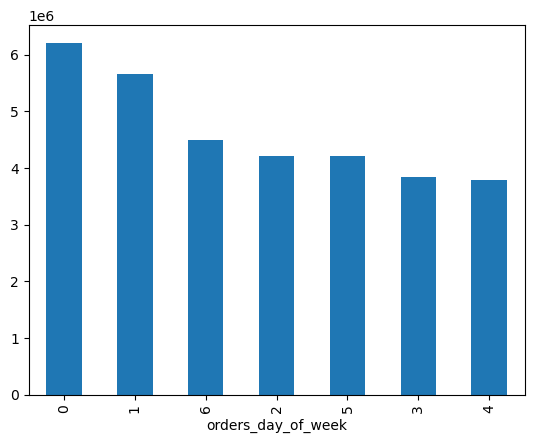

In [9]:
df['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

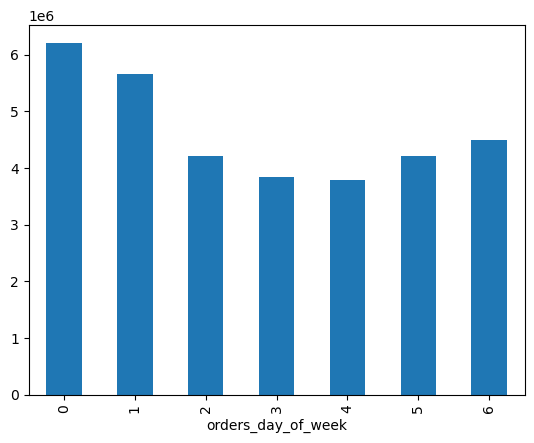

In [10]:
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

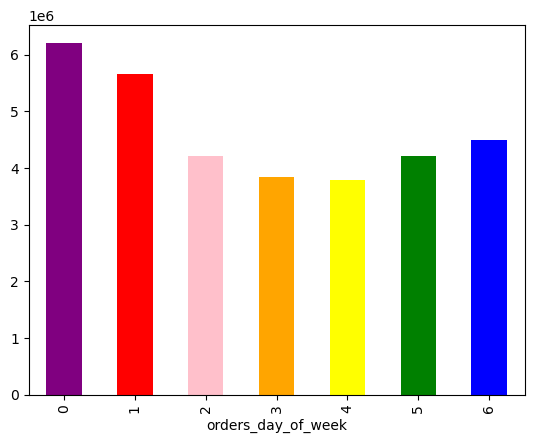

In [11]:
df['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

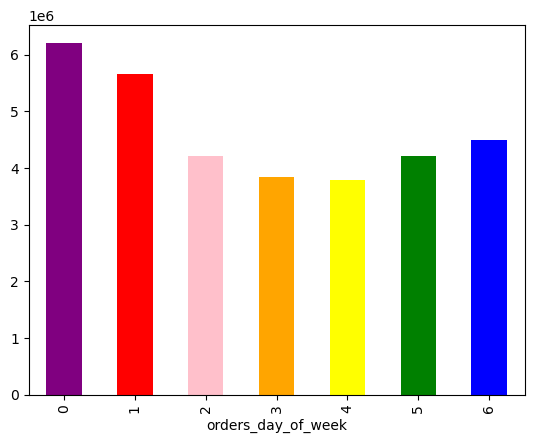

In [12]:
bar_chart = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

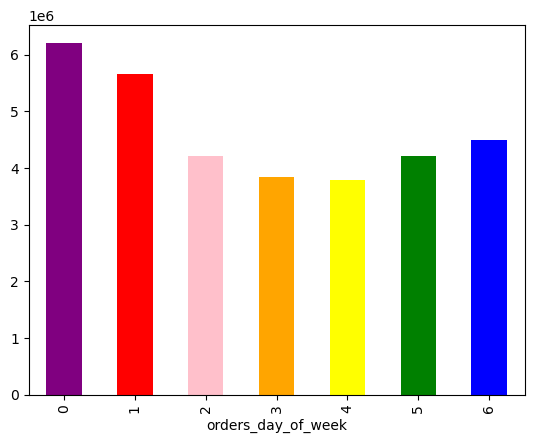

In [13]:
bar_chart.figure

In [14]:
# Export bar chart
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_orders_dow.png'), bbox_inches = 'tight')

## Create a histogram

<Axes: ylabel='Frequency'>

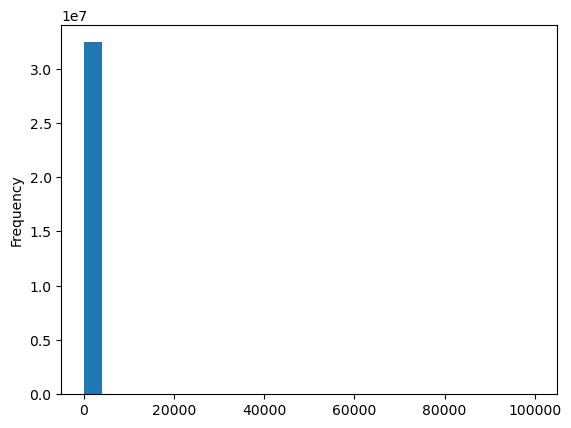

In [16]:
df['prices'].plot.hist(bins = 25)

In [17]:
# Investigate descriptive statistics
df['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
df['prices'].mean()

11.981143922966249

In [19]:
df['prices'].median()

7.4

In [20]:
df['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

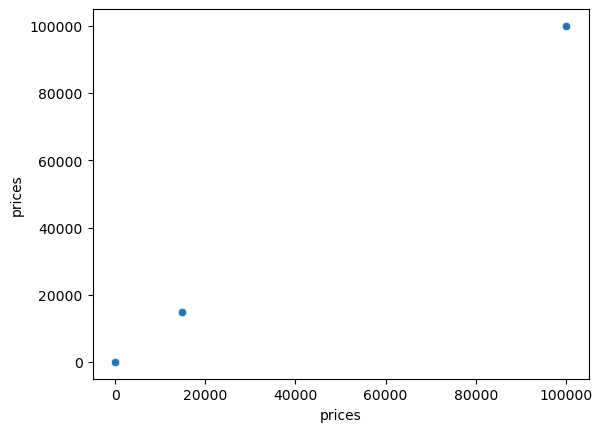

In [21]:
# Investigate ouliers
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [22]:
df.loc[df['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
7816,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7817,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15172,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20294,965345,3531,prior,27,2,19,8.0,33664,2,0,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20528,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333019,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32337105,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32340034,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32359285,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [23]:
# Turn outliers into NaNs
df.loc[df['prices'] >100, 'prices'] = np.nan

In [24]:
df['prices'].max()

25.0

<Axes: ylabel='Frequency'>

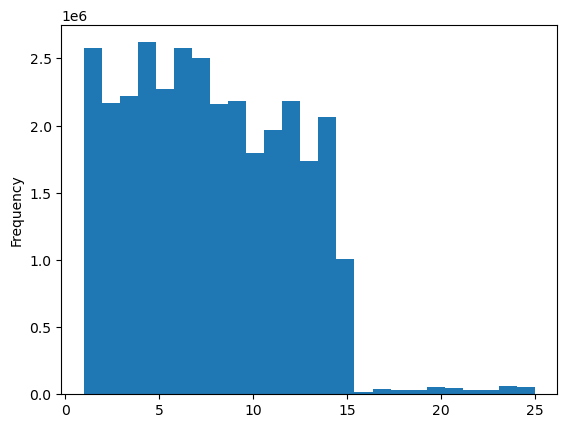

In [25]:
# Create histogram
df['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

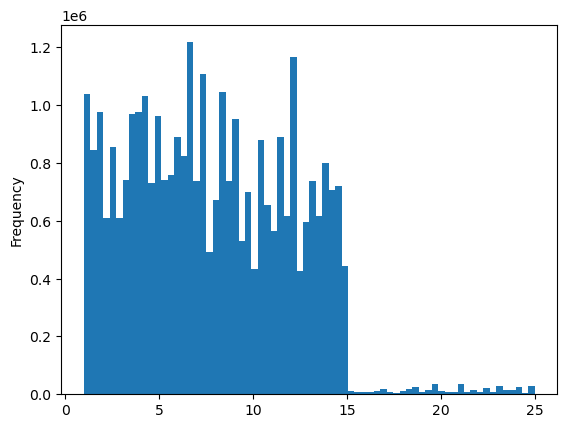

In [26]:
df['prices'].plot.hist(bins = 70)

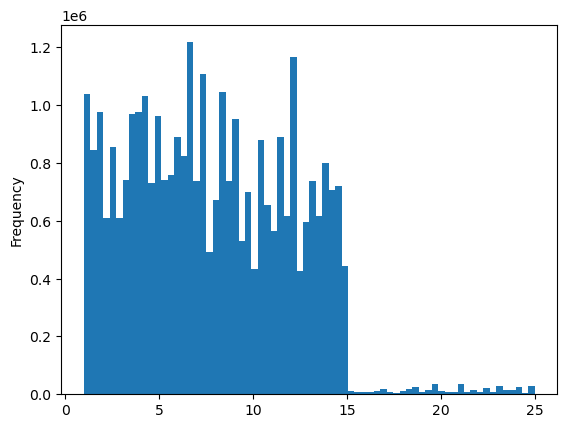

In [27]:
histogram = df['prices'].plot.hist(bins = 70)

In [28]:
# Export histogram
histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram.png'), bbox_inches = 'tight')

## Create a line chart

In [30]:
# Create a sample subset 
# Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [31]:
# Store 70% of the sample in the df big
big = df[dev]

In [32]:
# Store 30% of the sample in the df small
small = df[~dev]

In [33]:
# Check results
len(df)

32434212

In [34]:
len(big) + len(small)

32434212

In [35]:
# Reduce sample to needed columns
df_2 = small[['orders_day_of_week','prices']]

In [36]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


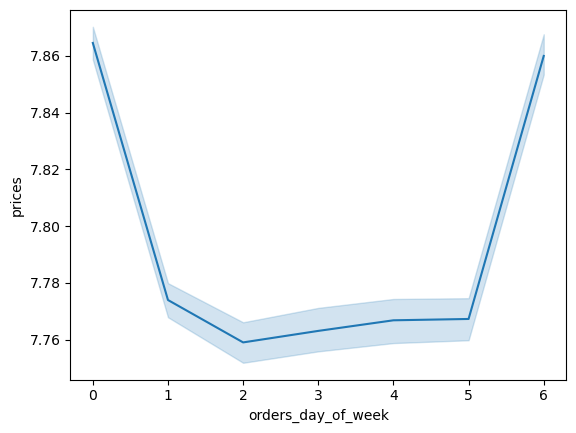

In [37]:
# Create line plot
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [38]:
# Export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_orders_day_of_week_prices.png'), bbox_inches = 'tight')

## Create histogram of order_time

<Axes: ylabel='Frequency'>

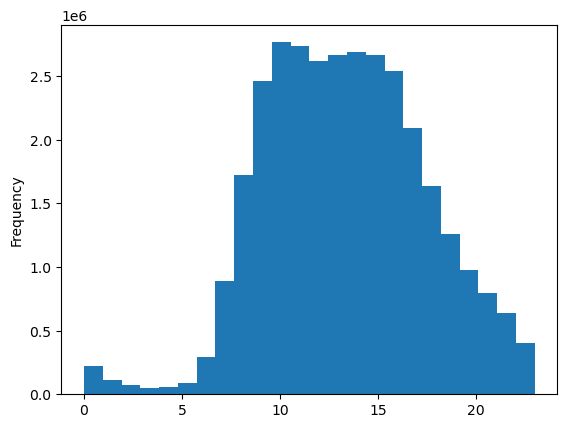

In [40]:
df['order_time'].plot.hist(bins = 24)

The histogram shows that most orders are made between 8:00 and 18:00 o'clock. Furthermore, it shows that order time is normally distributed. 

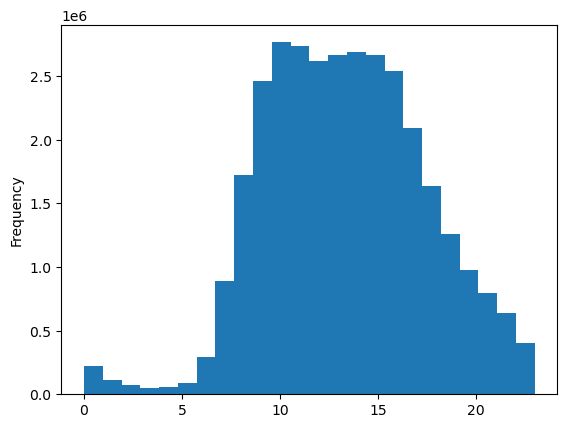

In [42]:
histogram_2 = df['order_time'].plot.hist(bins = 24)

In [43]:
# Export histogram
histogram_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_time.png'), bbox_inches = 'tight')

## Create bar chart from loyalty_flag

<Axes: xlabel='loyalty_flag'>

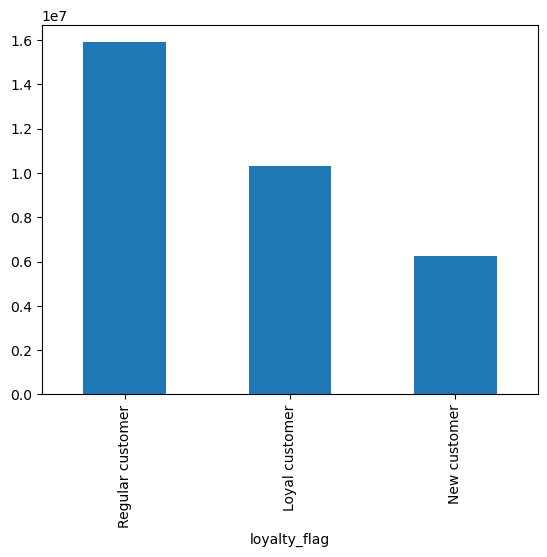

In [45]:
df['loyalty_flag'].value_counts().plot.bar()

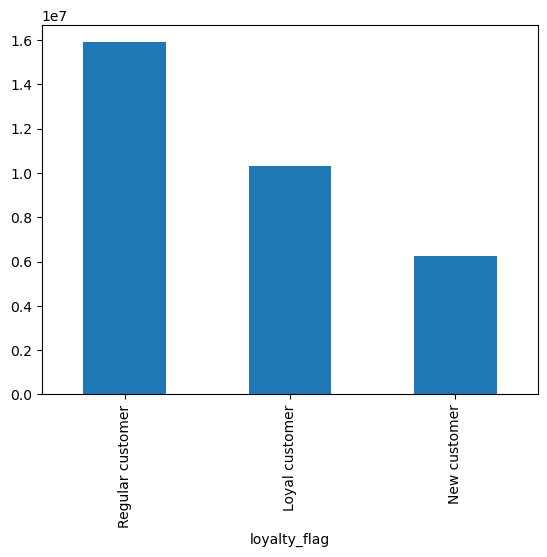

In [46]:
bar_chart_2 = df['loyalty_flag'].value_counts().plot.bar()

In [47]:
# Export bar chart
bar_chart_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_loyalty_flag.png'), bbox_inches = 'tight')

## Check if there's a difference in prices depending on the hour of the day

In [49]:
# Reduce sample to needed columns
df_3 = small[['order_time','prices']]

In [50]:
df_3.head()

,order_time,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


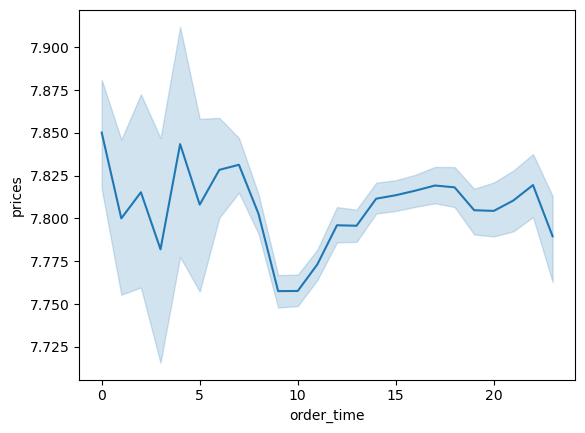

In [51]:
# Create line plot
line_2 = sns.lineplot(data = df_3, x = 'order_time',y = 'prices')

In [52]:
# Export line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_time_prices.png'), bbox_inches = 'tight')

## Determine whether there’s a connection between age and family situation

In [54]:
# Reduce sample to needed columns
df_4 = small[['age','n_dependants']]

In [55]:
df_4.head()

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


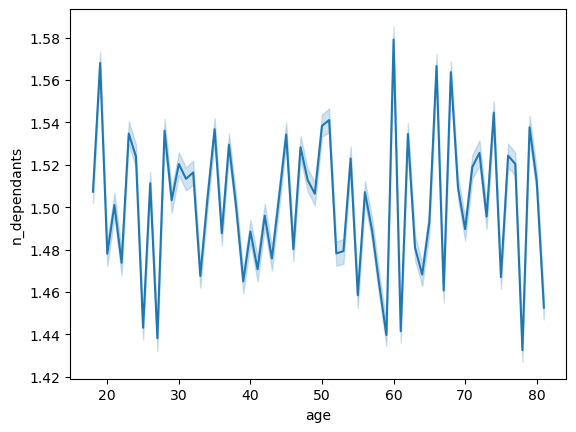

In [56]:
# Create line plot
line_3 = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

The line chart shows that there is no clear pattern concerning the relationship between age and number of dependants.

In [58]:
# Export line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_n_dependants.png'), bbox_inches = 'tight')

## Explore whether there’s a connection between age and income

In [60]:
# Reduce sample to needed columns
df_5 = small[['age','income']]

In [61]:
df_5.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


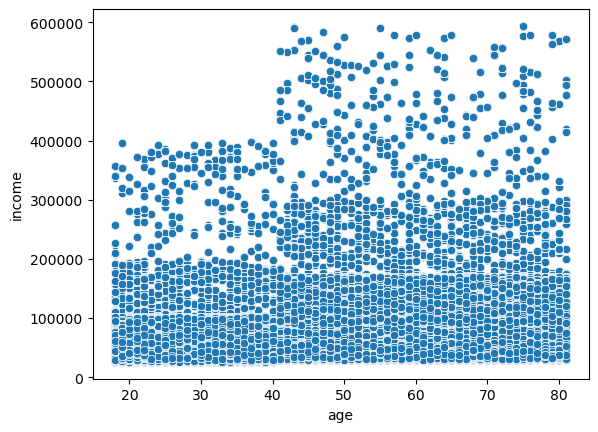

In [62]:
# Create scatterplot
scatter = sns.scatterplot(x = 'age', y = 'income',data = df_5)

The scatter plot shows that for all ages, most incomes are below 200k. Fewer people between the ages of 18 and 40 have incomes of up until 400k. For people aged 40-80, a different pattern emerges. Ad mentioned before, most incomes tend to be below 200k, however there are manypeople having incomes until 300k, and fewer people having incomes of up until 600k. 

In [64]:
# Export scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'), bbox_inches = 'tight')